<a href="https://colab.research.google.com/github/sankhauri/Body-Fat-Prediction-Using-Bayesian-Regression-/blob/main/Predictive_Model_for_Boston_Housing_Data_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import libraries
import xgboost as xgb
import numpy as np
import pandas as pd

#Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
#import modules
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

In [3]:
#Loading the Dataset
boston=pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")
## Observing the types of the variables
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
## First five rows of the dataset
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
## Summary of the variables
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


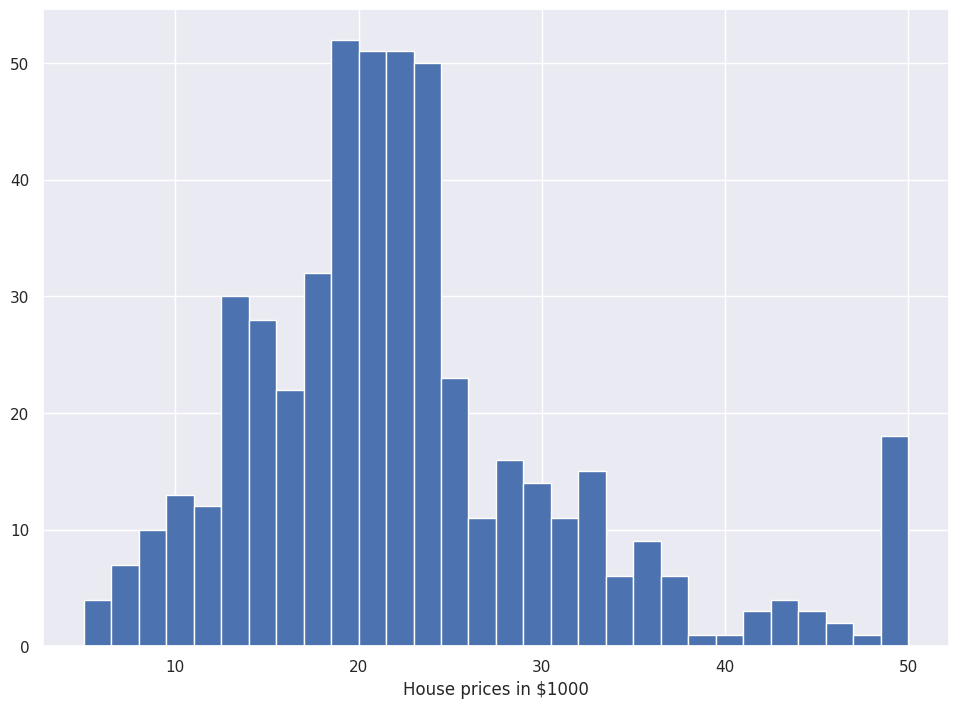

In [6]:
## Histogram of response variable
## Donot need to transform the dataset as we are using Gradient Boosting
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.hist(boston['medv'], bins=30)
plt.xlabel("House prices in $1000")
plt.show()

<Axes: >

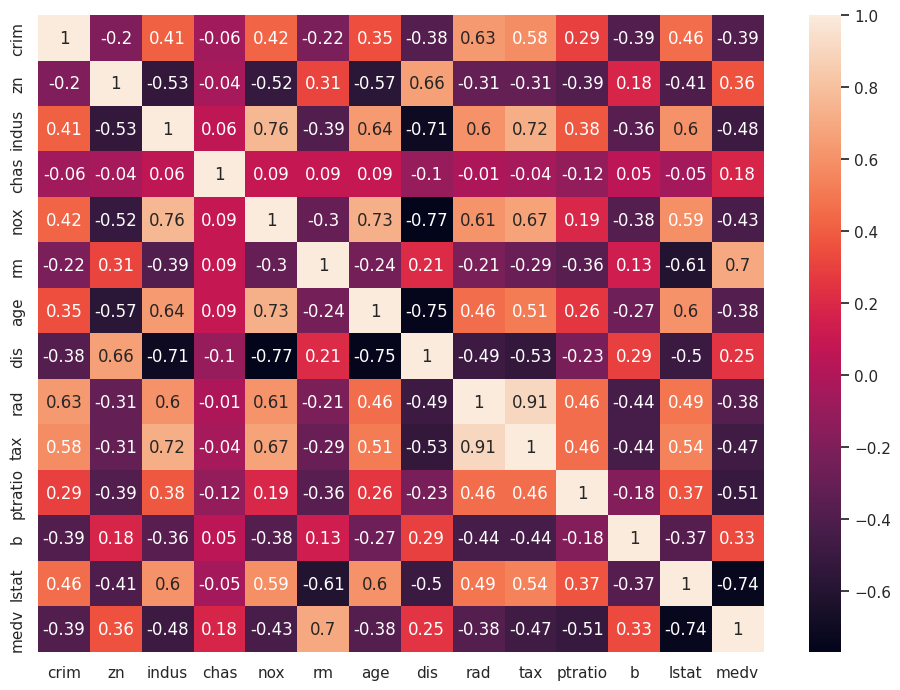

In [7]:
## Correlation matrix between the covariates
## We can see few covariates like tax, rad are highly correlated.
correlation_matrix = boston.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

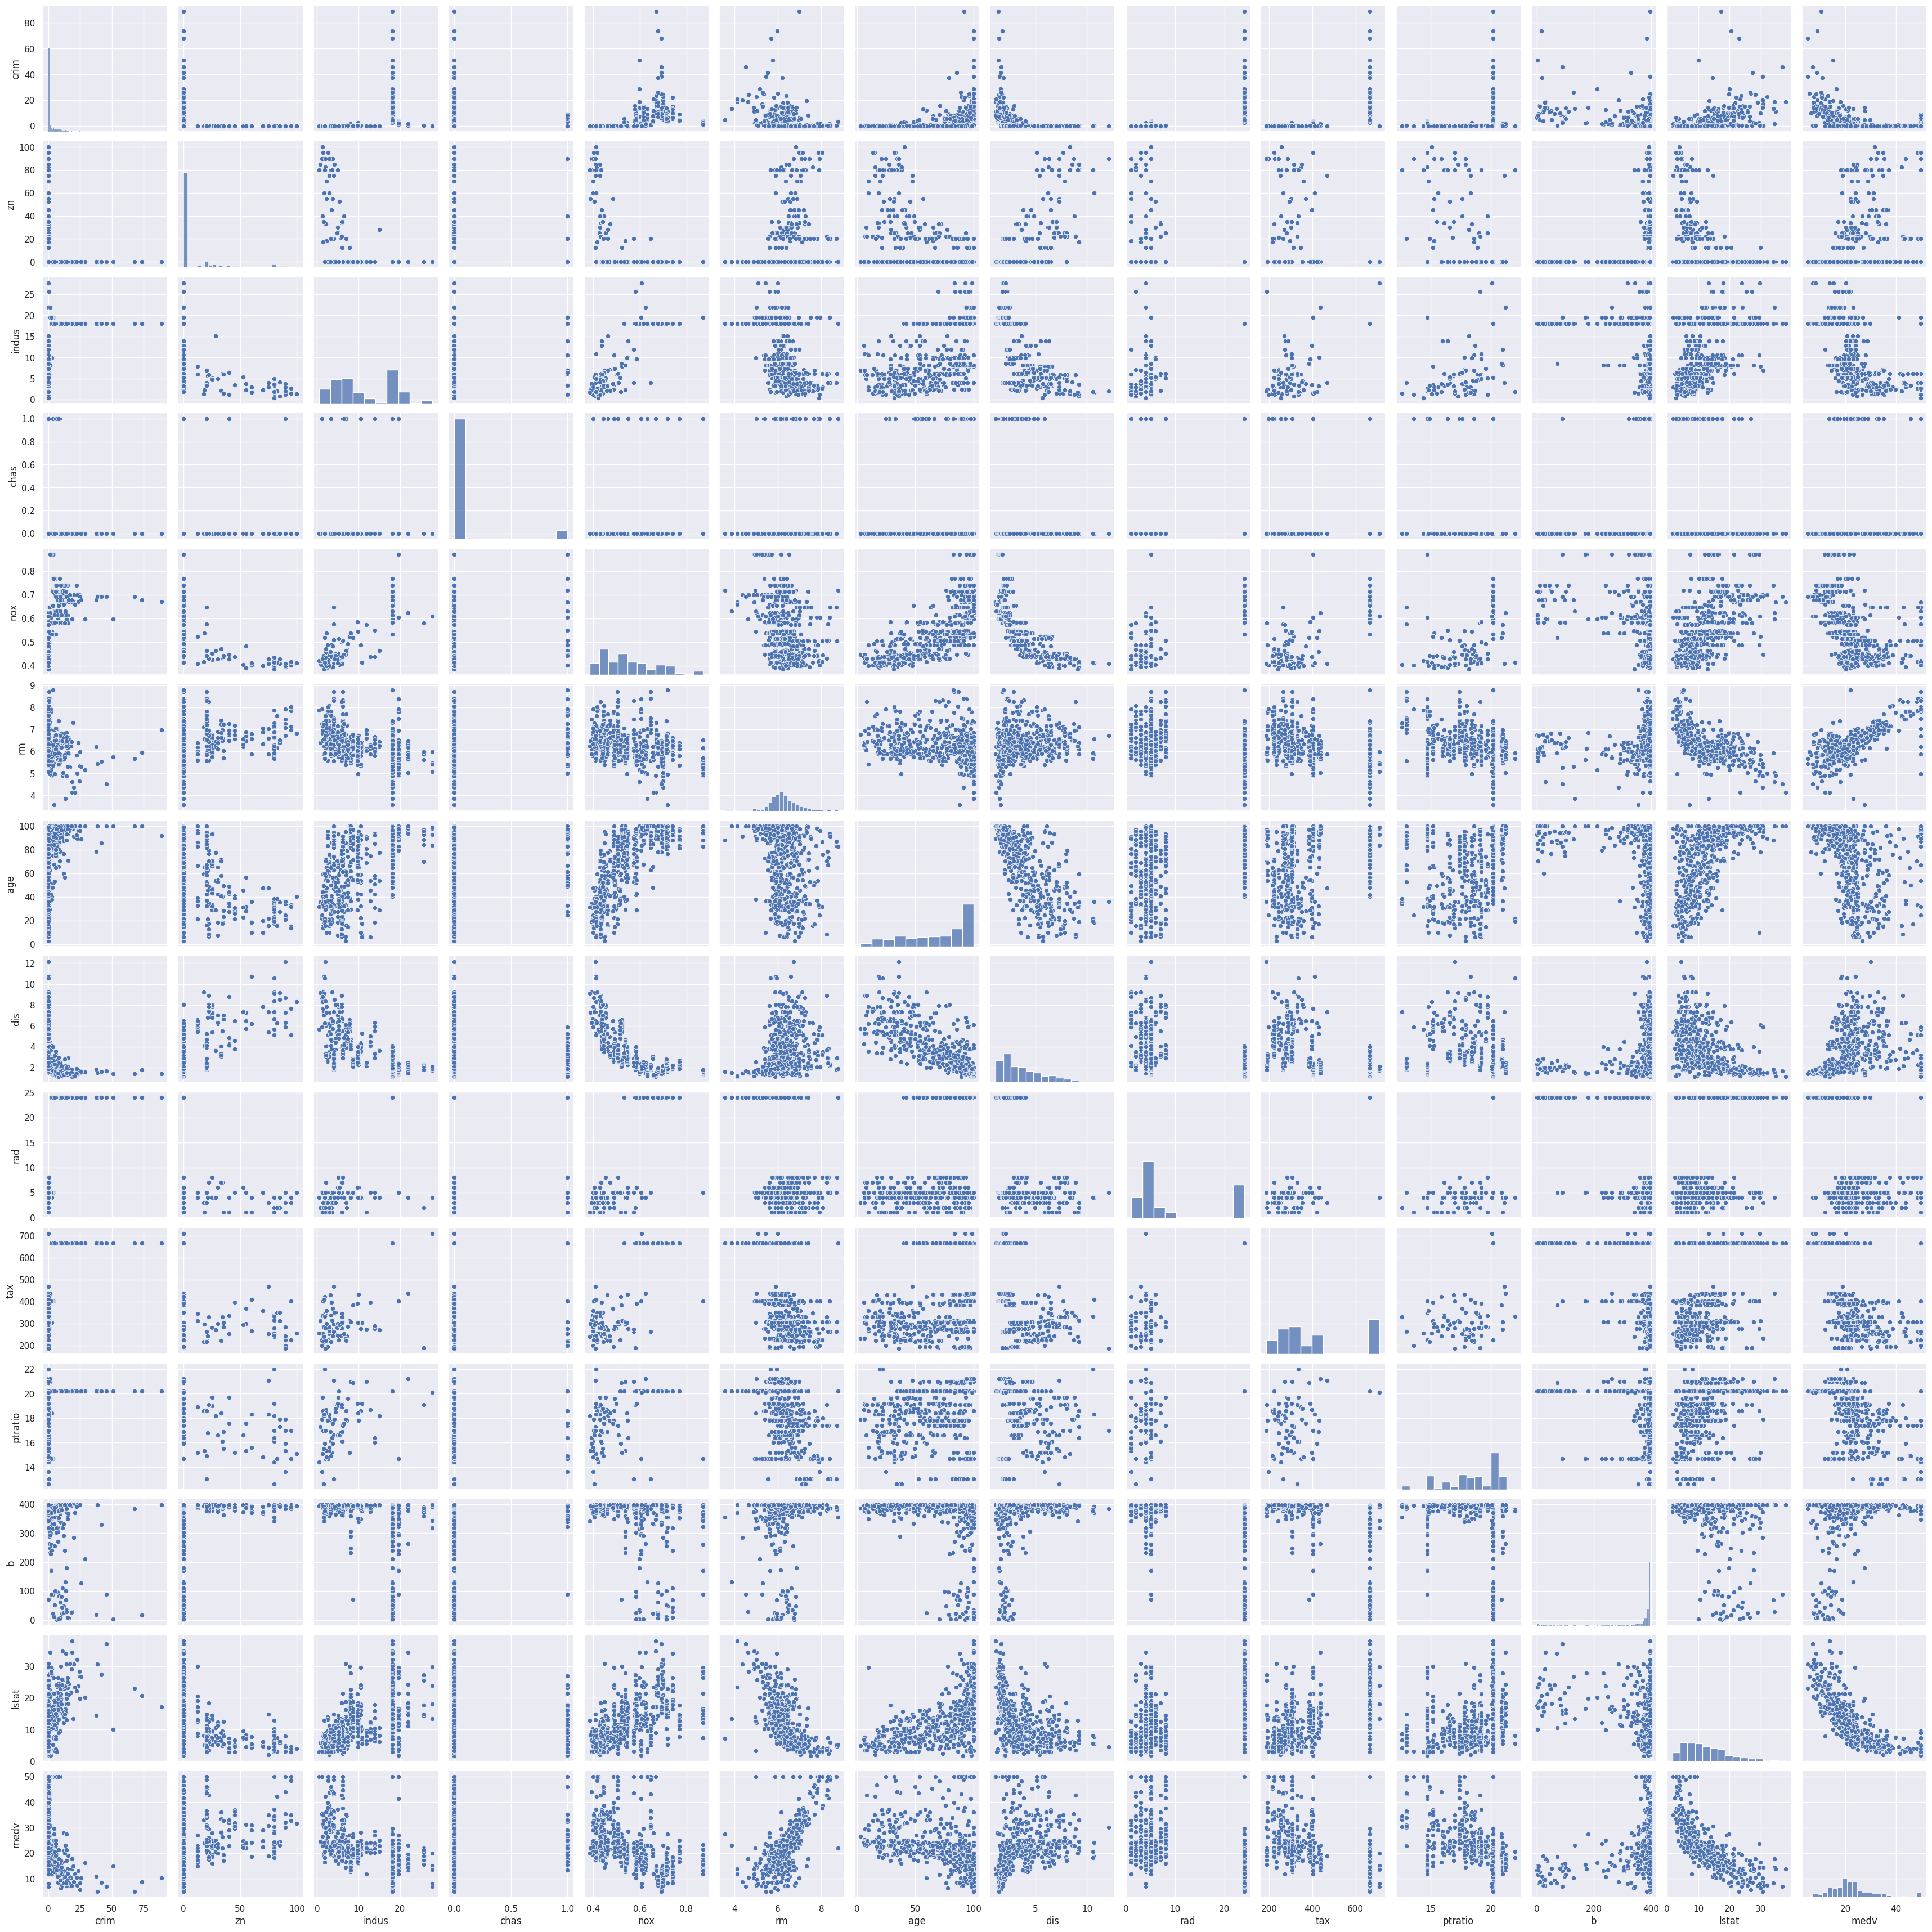

In [8]:
## Scatter plots for pair of variables
sns.pairplot(boston)
plt.show()

In [9]:
## Dividing Predictors and Response
X, y = boston.iloc[:,:-1], boston.iloc[:,-1]

In [11]:
## Splitting the dataset in Train and Test Data set
## We are using 80:20 split
X_train, X_test, y_train, y_test= train_test_split(X, y,
test_size=0.2, random_state=123)

In [12]:
## Fitting XGBRegressor on training dataset
xg_reg = xgb.XGBRegressor(objective='reg:linear', n_estimators=20,
seed=999)
xg_reg.fit(X_train, y_train)
## Predict on Test Dataset
preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,preds))
print("RMSE: %f" % (rmse))

RMSE: 4.047820


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [00:35:29] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


In [13]:
## Grid search
from sklearn.model_selection import GridSearchCV
housing_dmatrix = xgb.DMatrix(data=X,label=y)
gbm_param_grid = {'learning_rate': [0.01,0.1,0.5,0.9],
'n_estimators': [200],
'subsample': [0.3, 0.5, 0.9]}
gbm = xgb.XGBRegressor()
grid_mse = GridSearchCV(estimator=gbm,param_grid=gbm_param_grid,
scoring='neg_mean_squared_error', cv=4, verbose=1)
grid_mse.fit(X, y)
print("Best parameters found: ",grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

Fitting 4 folds for each of 12 candidates, totalling 48 fits
Best parameters found:  {'learning_rate': 0.1, 'n_estimators': 200, 'subsample': 0.5}
Lowest RMSE found:  4.479007194995824


In [14]:
##Random search
from sklearn.model_selection import RandomizedSearchCV
housing_dmatrix = xgb.DMatrix(data=X,label=y)
gbm_param_grid = {'learning_rate': np.arange(0.05,1.05,.05),
'n_estimators': [200],
'subsample': np.arange(0.05,1.05,.05)}
gbm = xgb.XGBRegressor()
randomized_mse = RandomizedSearchCV(estimator=gbm, param_distributions=gbm_param_grid,
n_iter=25, scoring='neg_mean_squared_error', cv=4, verbose=1)
randomized_mse.fit(X, y)
print("Best parameters found: ",randomized_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(randomized_mse.best_score_)))

Fitting 4 folds for each of 25 candidates, totalling 100 fits
Best parameters found:  {'subsample': 0.4, 'n_estimators': 200, 'learning_rate': 0.1}
Lowest RMSE found:  4.525903413882123
